## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

In [1]:
! git clone https://www.github.com/ds4e/clustering


Cloning into 'clustering'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 30 (delta 3), reused 1 (delta 1), pack-reused 23 (from 1)
Receiving objects: 100% (30/30), 4.21 MiB | 13.26 MiB/s, done.
Resolving deltas: 100% (3/3), done.


**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

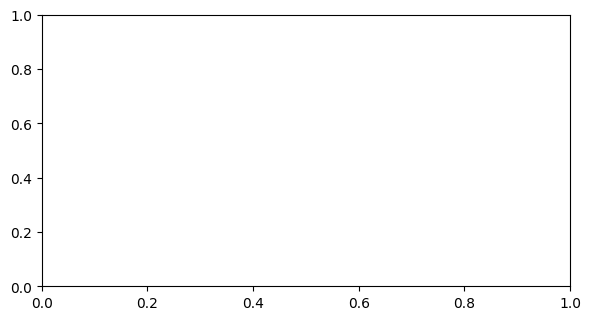

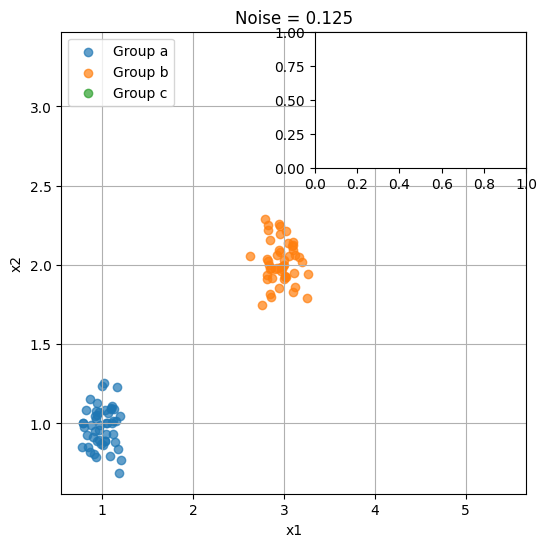

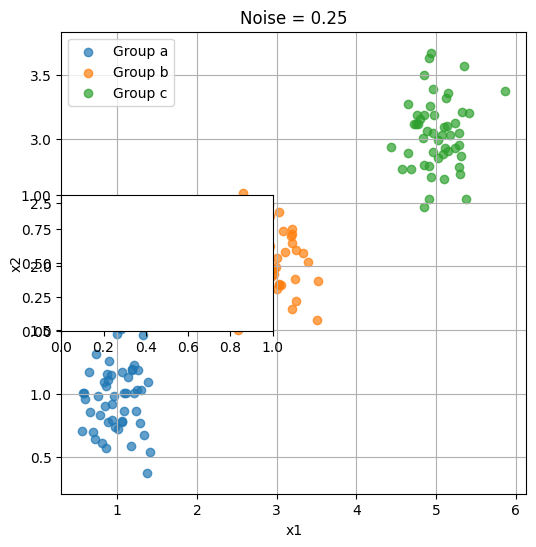

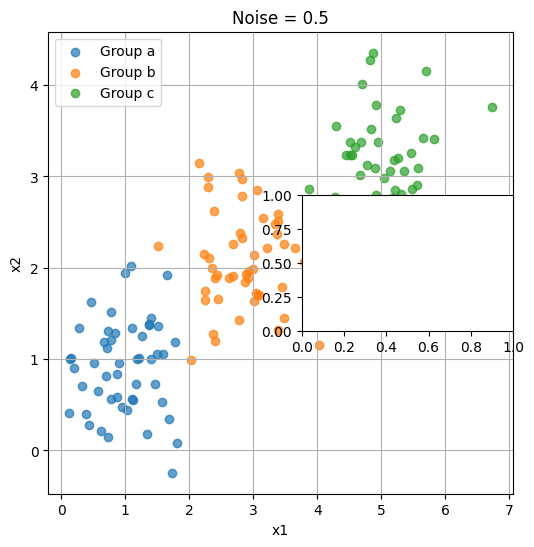

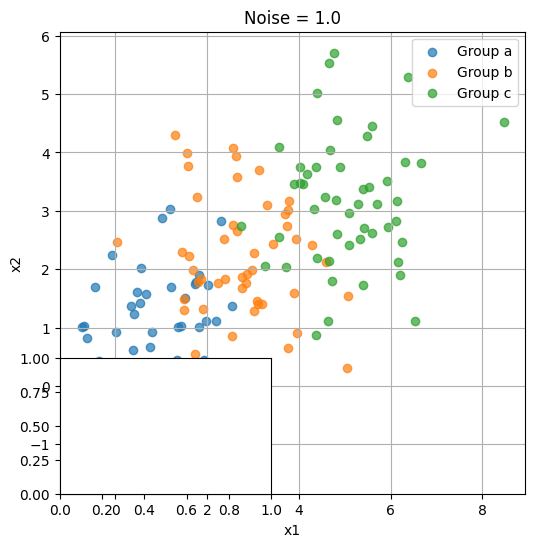

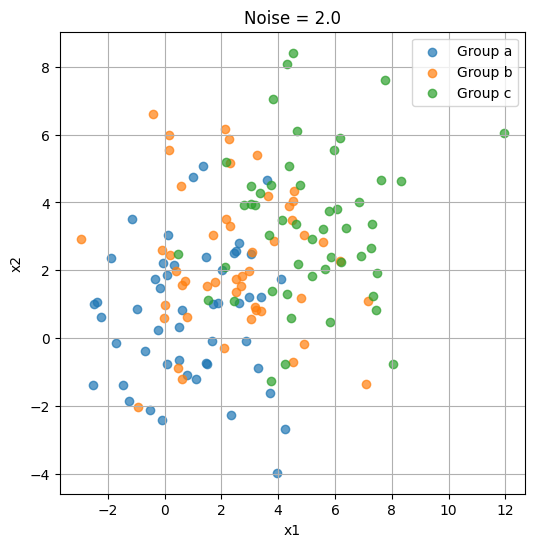

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

# Plotting function
def plot_data(df, title):
    plt.figure(figsize=(6, 6))
    for label in ['a', 'b', 'c']:
        subset = df[df['group'] == label]
        plt.scatter(subset['x1'], subset['x2'], label=f'Group {label}', alpha=0.7)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.grid(True)

# Plot all datasets
plt.figure(figsize=(15, 12))

for i, (df, noise) in enumerate([(df0_125, '0.125'), (df0_25, '0.25'), (df0_5, '0.5'), (df1_0, '1.0'), (df2_0, '2.0')]):
    plt.subplot(3, 2, i + 1)
    plot_data(df, f'Noise = {noise}')

2.  As the noise increases from 0.125 to 2.0, the clusters become less distinct.At low noise levels, the clusters are well-separated and clearly identifiable.
As the noise increases, the points from different groups overlap more, making it harder to distinguish the clusters. At the highest noise level (2.0), the clusters are almost entirely mixed and visually indistinguishable.

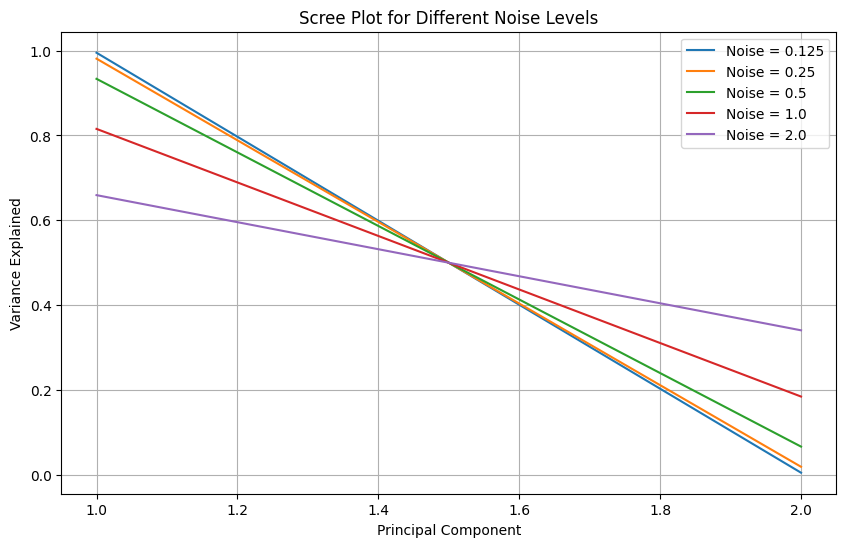

In [8]:
from sklearn.decomposition import PCA

plt.figure(figsize=(10, 6))

for df, noise in [(df0_125, '0.125'), (df0_25, '0.25'), (df0_5, '0.5'), (df1_0, '1.0'), (df2_0, '2.0')]:
    pca = PCA()
    X = df[['x1', 'x2']].values
    pca.fit(X)
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, label=f'Noise = {noise}')

plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot for Different Noise Levels')
plt.legend()
plt.grid(True)
plt.show()

 3. As the noise increases, the scree plot tends to lose the clear "elbow" that is visible at low noise levels. When noise is low (e.g., 0.125), the first component captures most of the variance, forming a sharp elbow. As noise increases, the variance explained by each component becomes more evenly distributed, making it harder to identify an optimal k. At the highest noise levels, the absence of a clear elbow suggests that the data lacks distinct clusters and is dominated by random noise.

4.

The intuition behind the elbow in a scree plot is based on the diminishing returns of adding more principal components. In a scree plot, the x-axis represents the number of principal components, and the y-axis shows the proportion of variance explained by each component.

At Low Noise (0.125): The clusters are well-separated, so most of the variance is captured by the first one or two components. This results in a sharp drop in variance explained after the first component, forming a clear elbow. The elbow indicates that adding more components doesn't provide significantly more explanatory power.

At Medium Noise (0.5): The separation between clusters becomes less distinct. While the first component may still capture most of the variance, the additional components explain more variance due to the overlap and spread of the clusters. The elbow becomes less pronounced.

At High Noise (2.0): The data is dominated by noise, making the clusters indistinguishable. The variance is more evenly distributed across components, resulting in a gradual slope instead of a sharp elbow. Without a clear elbow, it becomes difficult to determine the optimal number of components, as no point stands out as a natural cutoff.

The scree plot is most effective for identifying an appropriate number of components when the data has clear structure. In the presence of high noise, alternative methods like cross-validation or examining cluster separation might be necessary.









**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/clustering/assignment/data/airbnb_hw.csv')

# Clean and preprocess the data
df['Price'] = pd.to_numeric(df['Price'].replace('[\$,]', '', regex=True), errors='coerce')
df_cleaned = df[['Beds', 'Number Of Reviews', 'Review Scores Rating', 'Price']].dropna()



In [12]:
#2
# Normalize the data
scaler = MinMaxScaler()
df_cleaned[['Beds', 'Number of Reviews', 'Review Scores Rating']] = scaler.fit_transform(
    df_cleaned[['Beds', 'Number Of Reviews', 'Review Scores Rating']]
)

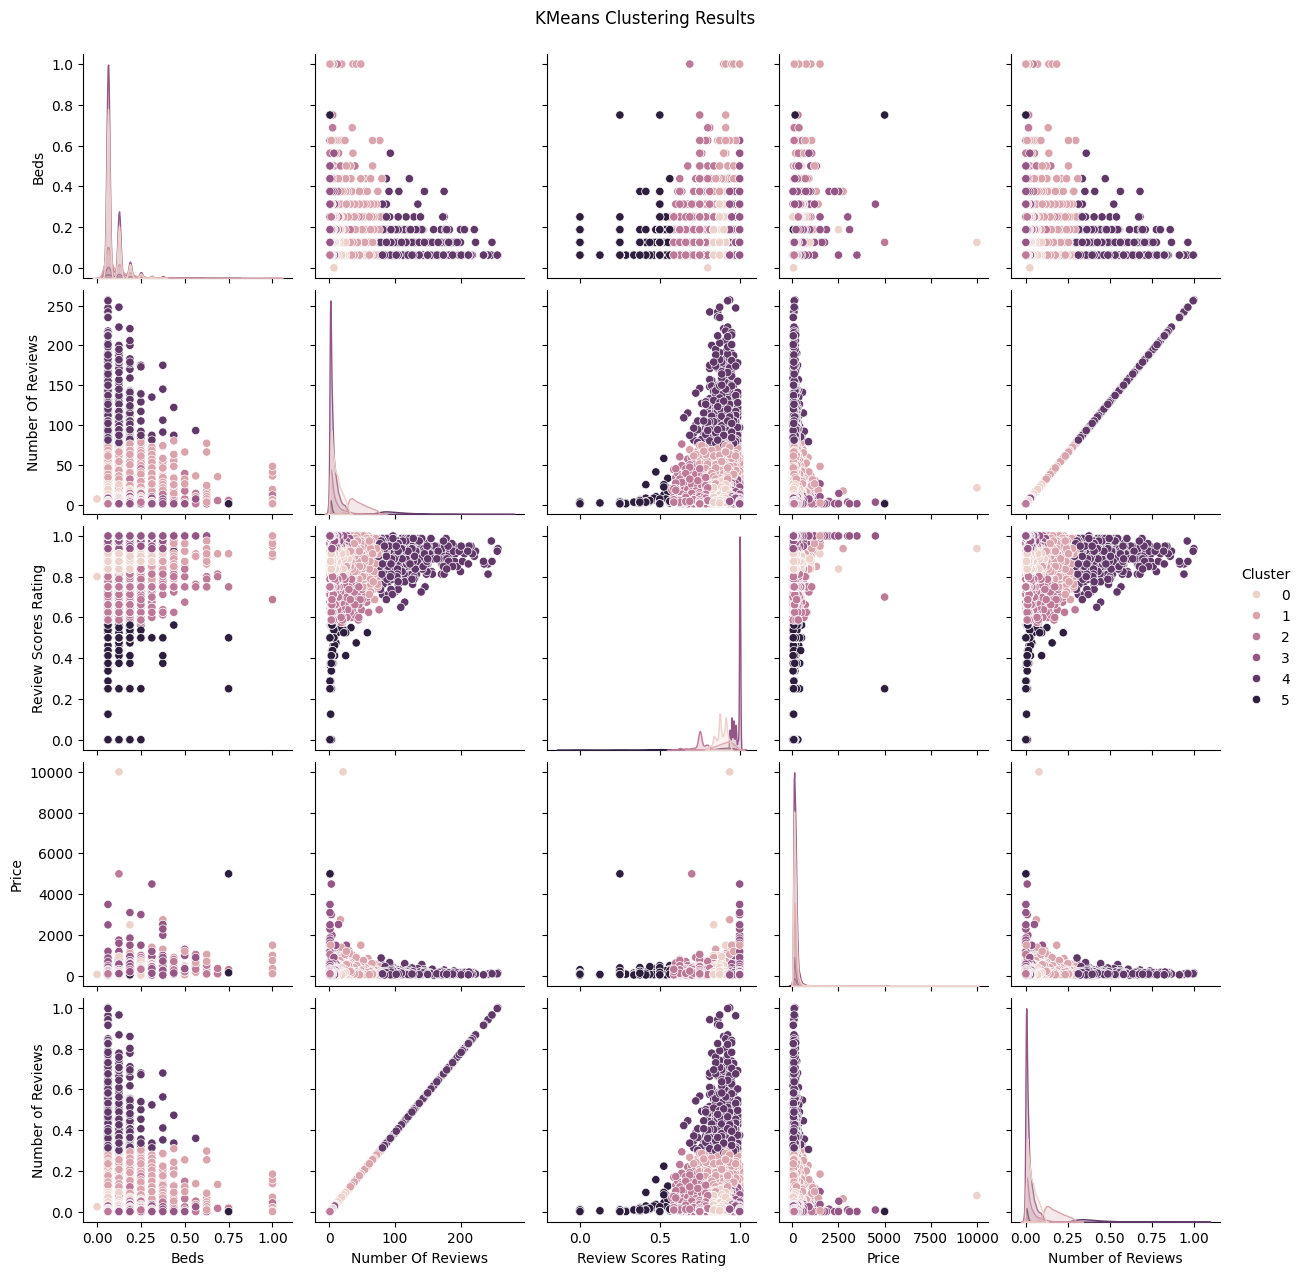

In [13]:
#3
# Perform KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(df_cleaned[['Beds', 'Number of Reviews', 'Review Scores Rating']])

# Visualize with pairplot
sns.pairplot(df_cleaned, hue='Cluster', diag_kind='kde')
plt.suptitle('KMeans Clustering Results', y=1.02)
plt.show()


In [14]:
#5
# Compute average price per cluster
cluster_summary = df_cleaned.groupby('Cluster')['Price'].describe()
print(cluster_summary)


          count        mean         std   min   25%    50%    75%      max
Cluster                                                                   
0        6322.0  147.515976  158.201218  24.0  85.0  125.0  180.0  10000.0
1        3084.0  163.313230  135.269730  22.0  90.0  130.0  190.0   2750.0
2        2876.0  143.567455  136.736731  20.0  75.0  117.5  179.0   5000.0
3        8592.0  164.224744  147.665778  10.0  89.0  139.0  200.0   4500.0
4         830.0  132.362651   82.023488  27.0  80.0  110.0  165.0    875.0
5         407.0  129.533170  255.865812  25.0  60.0   90.0  150.0   5000.0


5. Clusters 1 and 3 have the highest rental Prices.

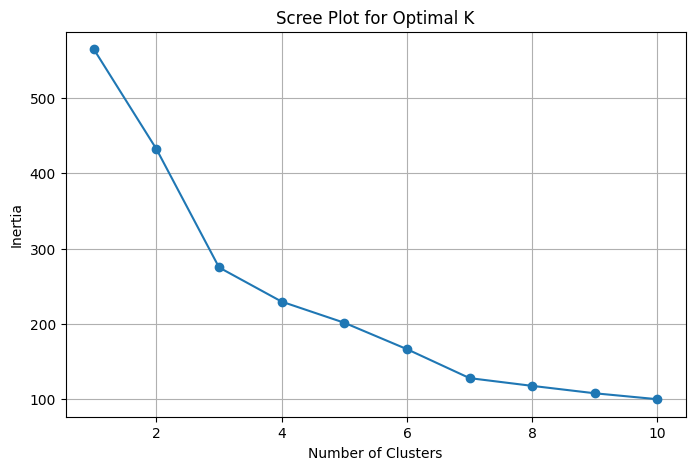

In [15]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cleaned[['Beds', 'Number of Reviews', 'Review Scores Rating']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot for Optimal K')
plt.grid()
plt.show()


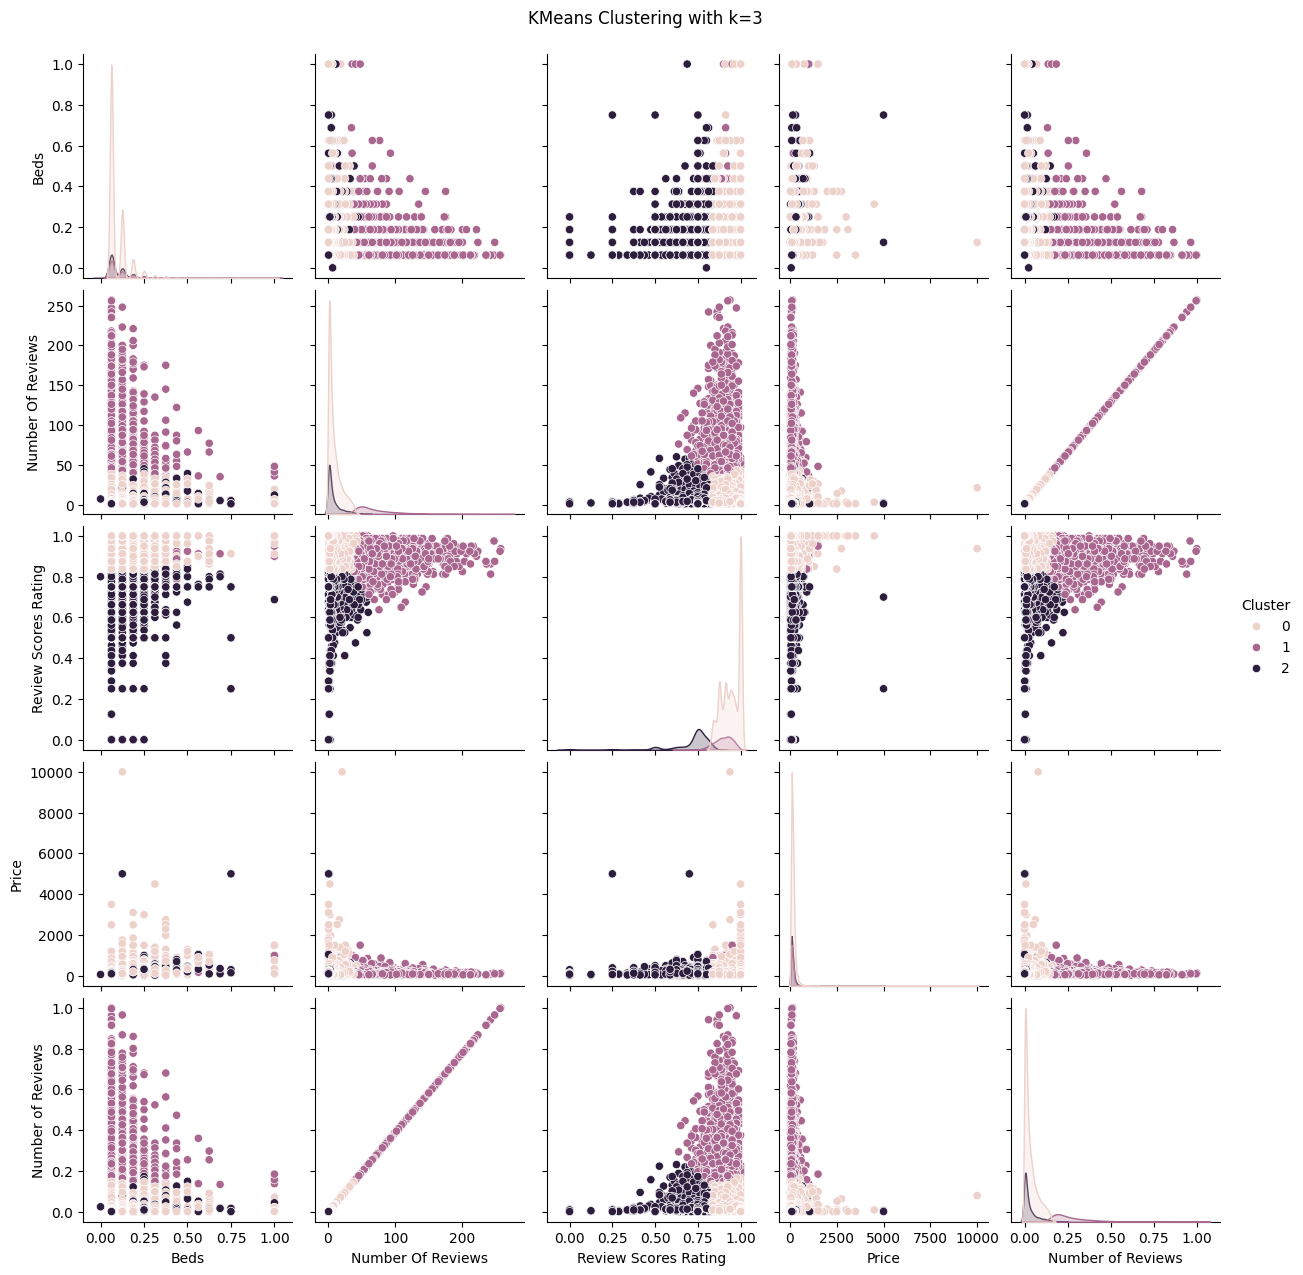

           count        mean         std   min   25%    50%    75%      max
Cluster                                                                    
0        16015.0  159.873618  154.874545  10.0  87.0  130.0  195.0  10000.0
1         2516.0  143.183227   95.013806  22.0  85.0  120.0  175.0   1500.0
2         3580.0  140.259497  151.260778  20.0  70.0  110.0  175.0   5000.0


In [16]:
# Perform KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(df_cleaned[['Beds', 'Number of Reviews', 'Review Scores Rating']])

# Visualize with pairplot
sns.pairplot(df_cleaned, hue='Cluster', diag_kind='kde')
plt.suptitle('KMeans Clustering with k=3', y=1.02)
plt.show()

# Compute average price per cluster
cluster_summary = df_cleaned.groupby('Cluster')['Price'].describe()
print(cluster_summary)


**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?